## Project 2 : Toxic Tweets Dataset : NLP Problem

### This dataset has a collection of Tweets. Its labelled as Toxic - 1, Non toxic - 0. Apply the NLP methods to predict the toxicity of the tweets. Download the dataset from the following Kaggle Compitation https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset. All the credits to the original collectors.

### Procedure:

#### 1. Convert the CSV file to the panda data frame.

#### 2. Convert the text to the following.
#### • Bag of Words
#### • TF-IDF

#### 3. For the obtained features, apply the following methods of prediction.
#### • Decision Trees
#### • Random forest
#### • Naive Bayes Model
#### • K-NN Classifier
#### • SVM

#### 4. For each of this method produce the following metrics:
#### • Precision, Recall, F1 - Score
#### • Confusion Matrix
#### • RoC - AUC curve

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [2]:
df.Toxicity.value_counts()
len(df)

56745

In [3]:
df.drop(columns = ["Unnamed: 0"], axis=1, inplace=True)
df

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,1,"you've gone and broke the wrong heart baby, an..."
56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,1,youu got wild bitches tellin you lies


In [4]:
# Removing punctuations and digits from the string 
import string
def remove_punc_dig(text : str):
    '''
    text:str
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text

In [5]:
df["cur_tweet"] = df["tweet"].apply(lambda x:remove_punc_dig(x))
df

,Toxicity,tweet,cur_tweet
0,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie lifeasking pearls corey ...
56741,1,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [6]:
# We don't need tweet column now so dropping the column
df.drop(columns=['tweet'], axis=1, inplace=True)
df

,Toxicity,cur_tweet
0,0,user when a father is dysfunctional and is so ...
1,0,user user thanks for lyft credit i can t use c...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urð...
4,0,factsguide society now motivation
...,...,...
56740,1,you s a muthaf in lie lifeasking pearls corey ...
56741,1,you ve gone and broke the wrong heart baby and...
56742,1,young buck wanna eat dat nigguh like i aint fu...
56743,1,youu got wild bitches tellin you lies


In [7]:
# Removing stop words like I, my, myself, etc
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
#!pip install spacy

In [8]:
# We will use spacy lemmatizer API to perform lemmatization on cur_tweet and removing stop words
nlp = spacy.load('en_core_web_sm', disable=['parser','ner'])

#!python -m spacy download en_core_web_sm     

In [9]:
def remove_stop_words(text:str):
    '''
    text:str
    This function will remove stop words like I, my, myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

In [10]:
# Applying remove stop words function on cur_tweets of dataframe df
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x: remove_stop_words(x))

In [11]:
# We don't need the cur_tweet now so dropping the cur_tweet column
df.drop(columns=['cur_tweet'], axis=1, inplace=True)
df

,Toxicity,filtered_cur_tweet
0,0,user father dysfunctional selfish drags kids d...
1,0,user user thanks lyft credit t use cause don t...
2,0,bihday majesty
3,0,model love u u time urð± ðððð ð...
4,0,factsguide society motivation
...,...,...
56740,1,s muthaf lie lifeasking pearls corey emanuel r...
56741,1,ve gone broke wrong heart baby drove redneck c...
56742,1,young buck wanna eat dat nigguh like aint fuck...
56743,1,youu got wild bitches tellin lies


In [12]:
def lemmatizer(text:str):
    '''
    text:str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [13]:
# Applying lemmatizer function on cur_tweets of dataframe df
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x: lemmatizer(x))

In [14]:
df.drop(columns=['filtered_cur_tweet'], axis=1, inplace=True)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [16]:
# BAG OF WORDS
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemma_cur_tweet'])
bow.shape

(56745, 20056)

In [17]:
# TF - IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemma_cur_tweet'])
tfidf.shape

(56745, 20056)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [19]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, df['Toxicity'], test_size=0.20)

In [20]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(sm, annot=True, fmt='d', cmap='Blues', annot_kws={'size':16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [21]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr,tpr,_ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title(title)
    plt.legend('loc=lower right')
    plt.show()

In [22]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

In [23]:
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

SVC
*******Train************
Accuracy:  0.9866948629835228
Precision:  0.9931858685396792
Recall:  0.9755946864380599
F1 Score:  0.9843116883116882
*******Test************
Accuracy:  0.9503039915411049
Precision:  0.9727705922396188
Recall:  0.906150919467343
F1 Score:  0.9382797110965201

 



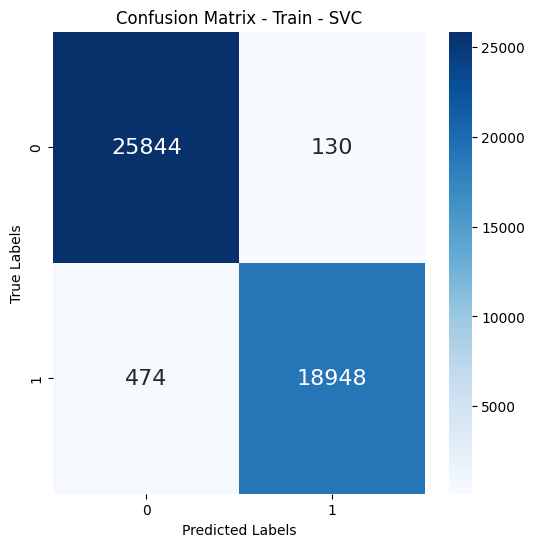

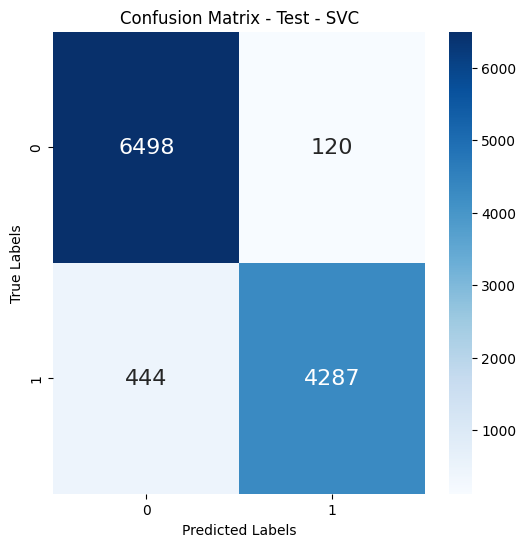

KNeighborsClassifier
*******Train************
Accuracy:  0.6866464005639263
Precision:  0.9515204170286707
Recall:  0.28194830604469157
F1 Score:  0.4350001985939547
*******Test************
Accuracy:  0.6632302405498282
Precision:  0.9243697478991597
Recall:  0.2092580849714648
F1 Score:  0.34126163391933817

 



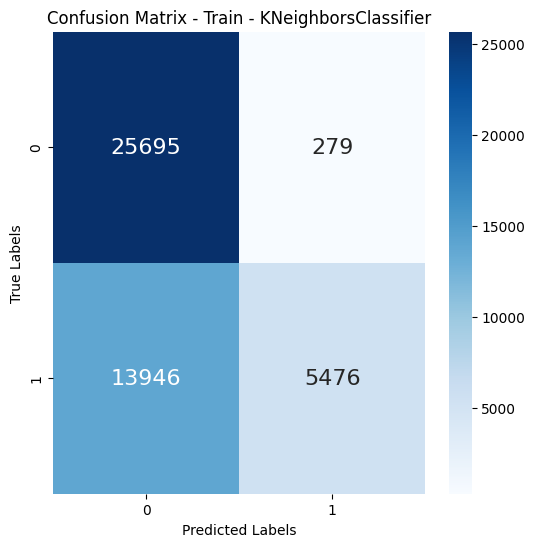

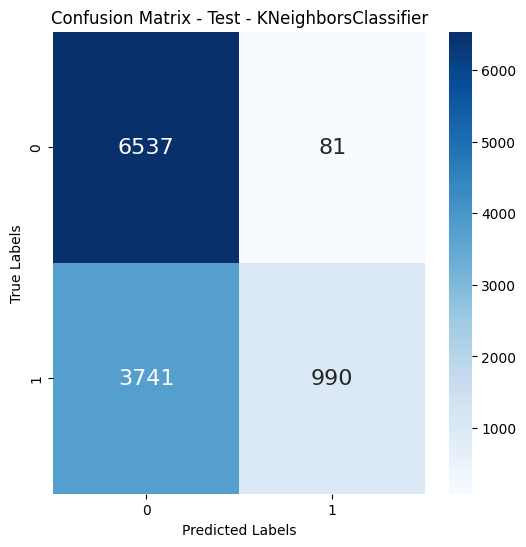

LogisticRegression
*******Train************
Accuracy:  0.9503921050312802
Precision:  0.9740474875759249
Recall:  0.9082483781278962
F1 Score:  0.9399978684855589
*******Test************
Accuracy:  0.9422856639351485
Precision:  0.968721251149954
Recall:  0.8902980342422321
F1 Score:  0.9278554906928076

 



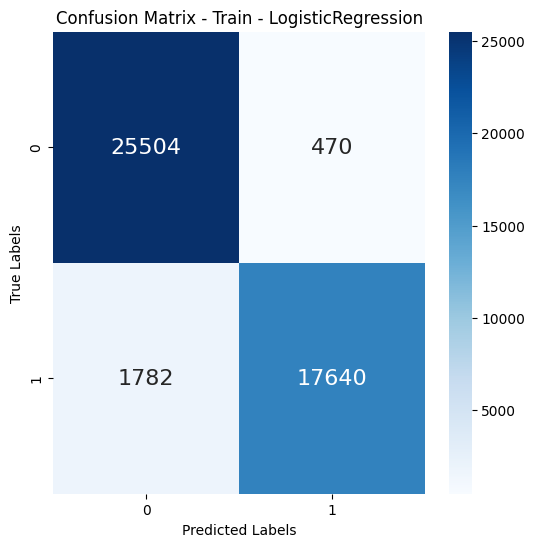

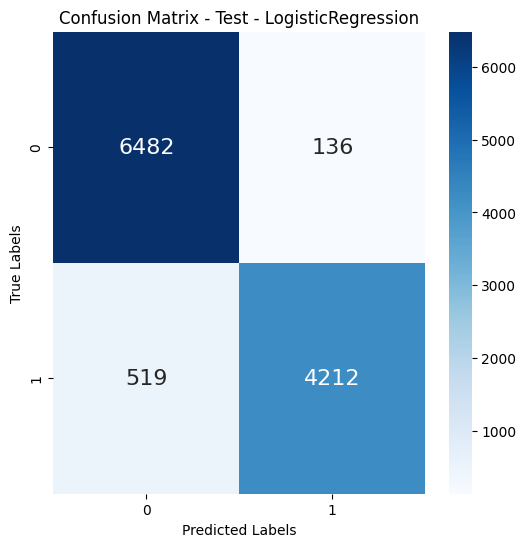

DecisionTreeClassifier
*******Train************
Accuracy:  0.9995374041765794
Precision:  0.9996394540303889
Recall:  0.9992791679538667
F1 Score:  0.9994592785230579
*******Test************
Accuracy:  0.9336505418979646
Precision:  0.925
Recall:  0.9150285351934052
F1 Score:  0.9199872489639783

 



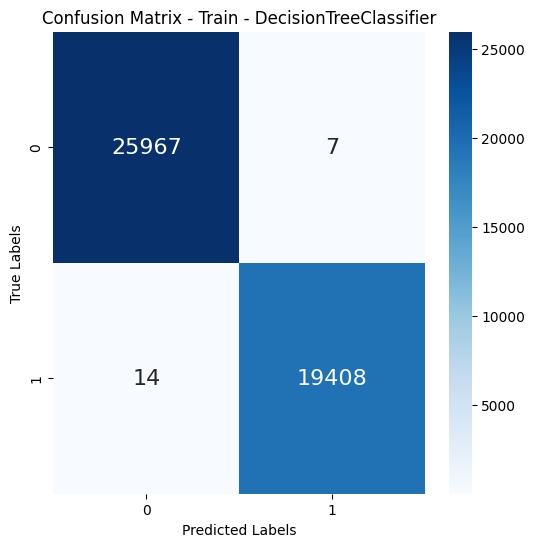

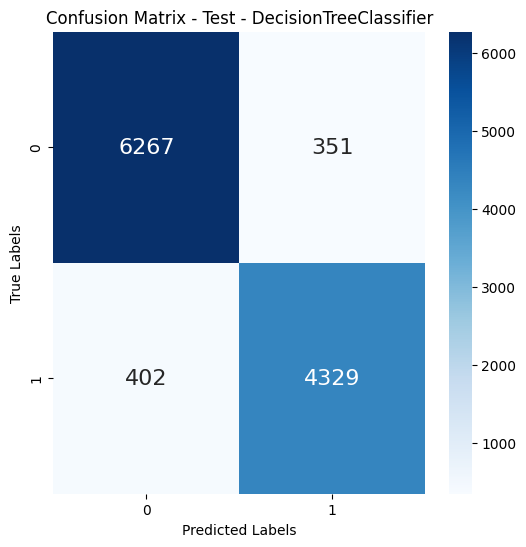

RandomForestClassifier
*******Train************
Accuracy:  0.9995374041765794
Precision:  0.9995879899057527
Recall:  0.999330655957162
F1 Score:  0.9994593063673112
*******Test************
Accuracy:  0.9446647281698828
Precision:  0.9410879380778328
Recall:  0.9251743817374762
F1 Score:  0.9330633127264976

 



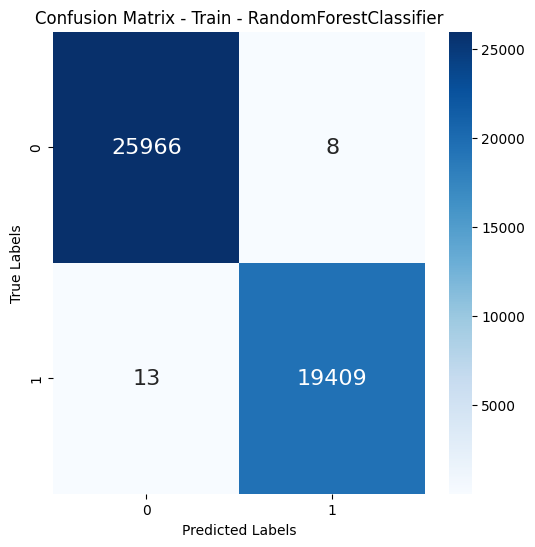

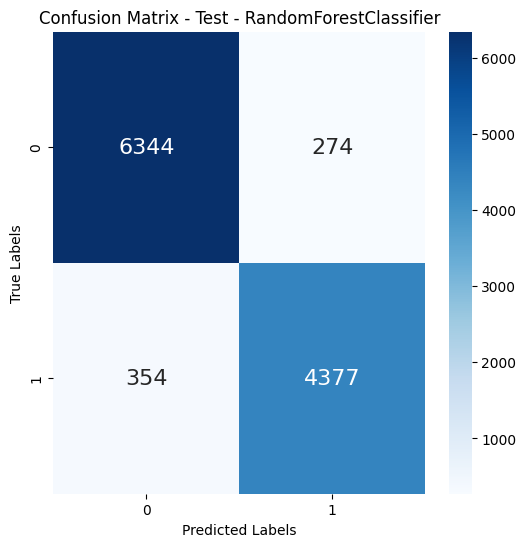

MultinomialNB
*******Train************
Accuracy:  0.9398184862102388
Precision:  0.9247251628664495
Recall:  0.9354855318710741
F1 Score:  0.9300742257486563
*******Test************
Accuracy:  0.9206097453520133
Precision:  0.8968089515126398
Recall:  0.9148171633904038
F1 Score:  0.905723553416344

 



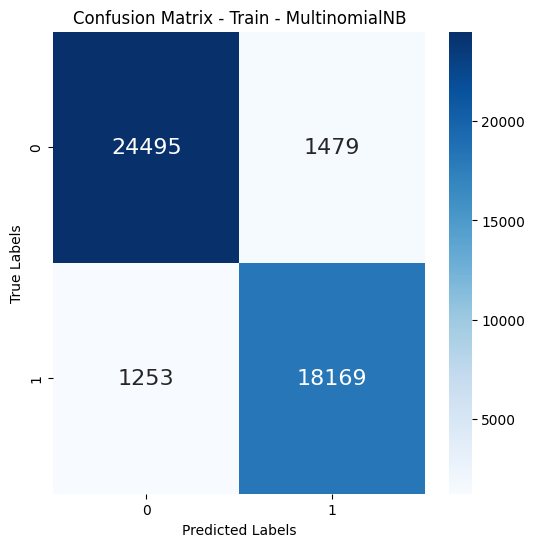

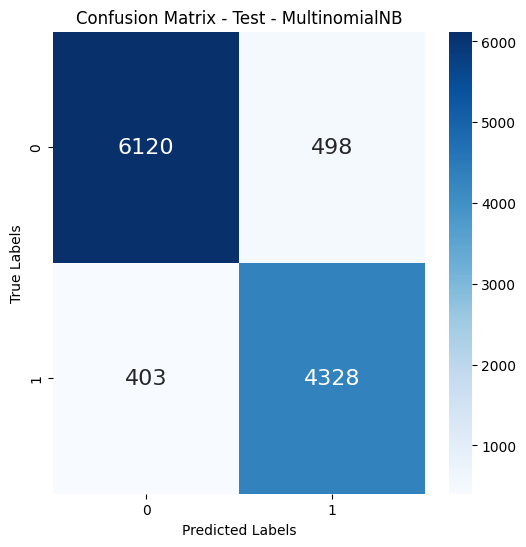

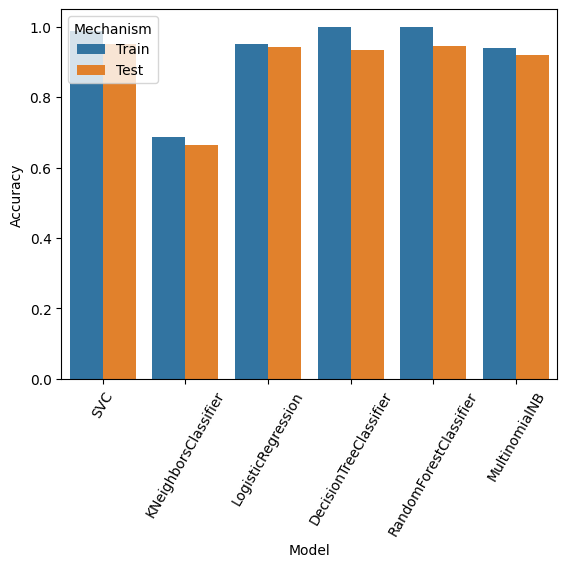

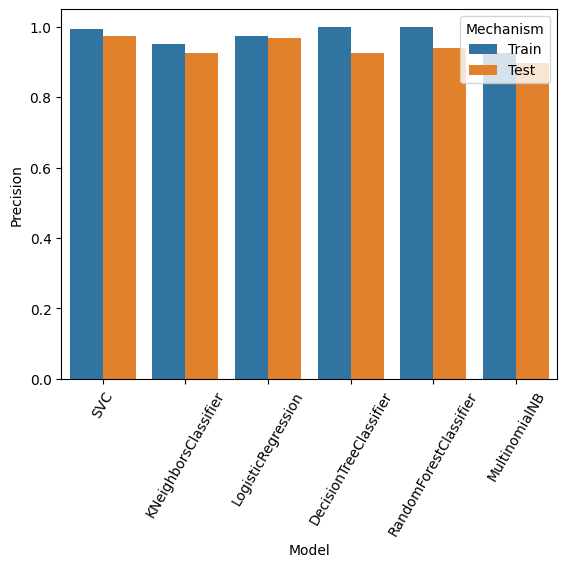

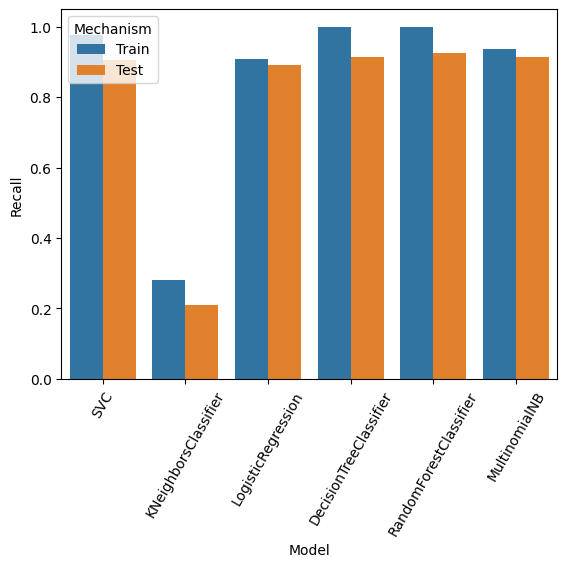

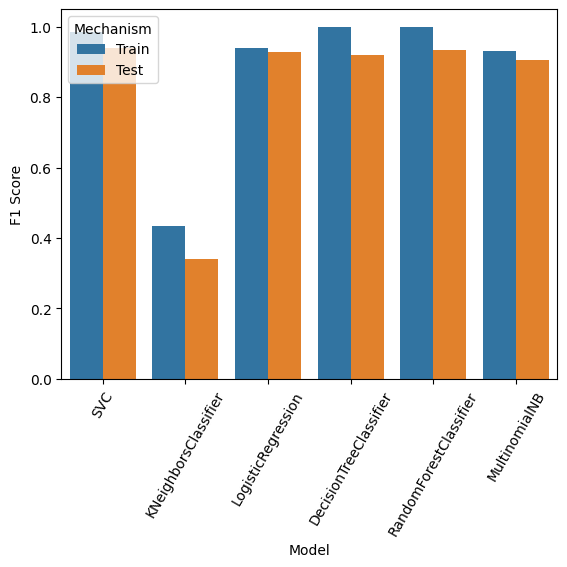

In [24]:
import sklearn.metrics
import seaborn as sns

models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),MultinomialNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    #train_probs = model.predict_proba(x_train)[:, 1]
    test_pred = model.predict(x_test)
    #test_probs = model.predict_proba(x_test)[:, 1]
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred))
    print("Recall: ",recall_score(y_train,train_pred))
    print("F1 Score: ",f1_score(y_train,train_pred))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred))
    train_recalls.append(recall_score(y_train,train_pred))
    train_f1s.append(f1_score(y_train,train_pred))
    
    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred))
    print("Recall: ",recall_score(y_test,test_pred))
    print("F1 Score: ",f1_score(y_test,test_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred))
    test_recalls.append(recall_score(y_test,test_pred))
    test_f1s.append(f1_score(y_test,test_pred))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for training data
    '''plot_roc_auc_curve(y_train, train_probs, f"ROC-AUC Curve - Train - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for testing data
    plot_roc_auc_curve(y_test, test_probs, f"ROC-AUC Curve - Test - {type(model).__name__}")'''

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()

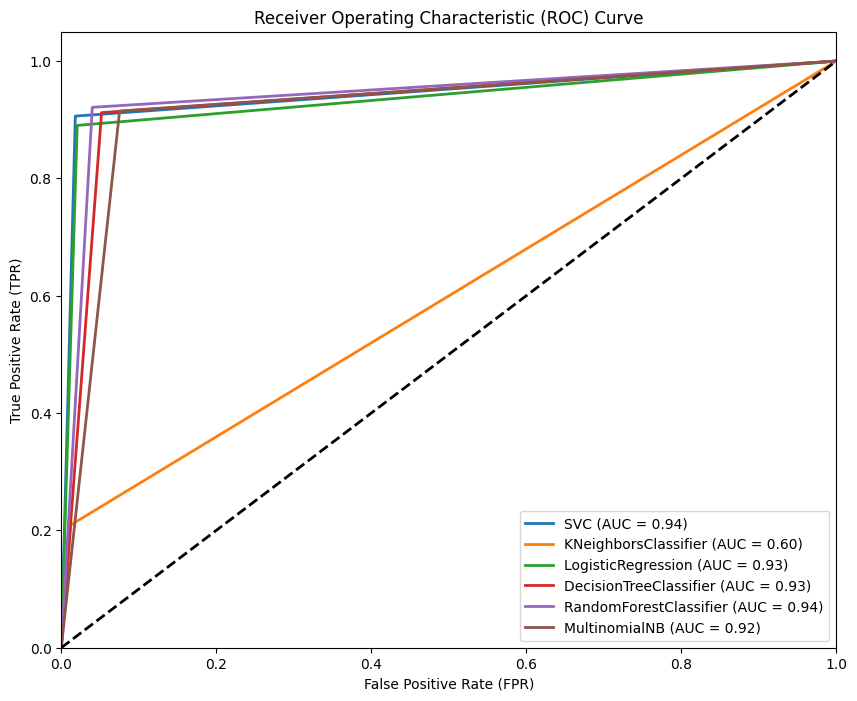

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB()]

for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)
    
# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()